In [1]:
from sklearn.datasets import load_boston
import xgboost
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
import numpy as np

In [2]:
boston = load_boston()

In [3]:
boston.data.shape

(506, 13)

In [7]:
boston.data[0].shape

(13,)

In [4]:
boston.target.shape

(506,)

In [15]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [8]:
# train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target ,test_size=0.1)

In [20]:
X_test.shape

(51, 13)

In [10]:
# 모델 생성
xgb_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [11]:
# 모델 fitting
print(len(X_train), len(X_test))
xgb_model.fit(X_train,y_train)

455 51


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.08, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.75,
             tree_method='exact', validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

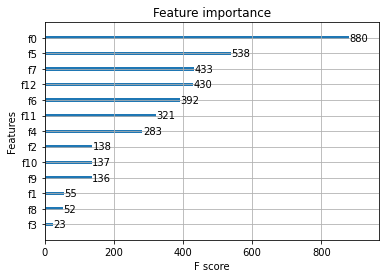

In [12]:
xgboost.plot_importance(xgb_model)

In [13]:
# 값 예측
predictions = xgb_model.predict(X_test)
predictions

array([23.503878, 41.665455, 17.40861 , 47.51008 , 20.881943, 19.334352,
       17.836657, 24.110565, 19.480959, 26.524529, 16.986753, 16.797829,
       25.193876, 21.039854, 34.228046, 14.58426 , 20.092733, 29.564821,
       22.170765, 14.578019, 20.940695, 20.093672, 10.984306, 16.776066,
       26.145742, 23.917273, 18.33301 , 10.898828, 23.962229, 20.055454,
        8.957449, 14.63337 , 29.866983, 12.017723, 18.363081, 28.81605 ,
       14.472699, 11.423408, 25.421894, 15.143356, 16.054192, 34.416378,
       39.605816, 11.215051, 20.437115, 29.322308, 20.47356 , 22.668621,
       27.522396, 19.163034, 19.546488], dtype=float32)

In [17]:
X_test[0].shape

(13,)

In [18]:
predictions2 = xgb_model.predict(X_test[0])

XGBoostError: [18:39:21] /Users/travis/build/dmlc/xgboost/src/predictor/cpu_predictor.cc:258: Check failed: m->NumColumns() == model.learner_model_param->num_feature (1 vs. 13) : Number of columns in data must equal to trained model.
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x000000012a161de4 dmlc::LogMessageFatal::~LogMessageFatal() + 116
  [bt] (1) 2   libxgboost.dylib                    0x000000012a27d52d void xgboost::predictor::CPUPredictor::DispatchedInplacePredict<xgboost::data::ArrayAdapter>(dmlc::any const&, std::__1::shared_ptr<xgboost::DMatrix>, xgboost::gbm::GBTreeModel const&, float, xgboost::PredictionCacheEntry*, unsigned int, unsigned int) const + 365
  [bt] (2) 3   libxgboost.dylib                    0x000000012a279861 xgboost::predictor::CPUPredictor::InplacePredict(dmlc::any const&, std::__1::shared_ptr<xgboost::DMatrix>, xgboost::gbm::GBTreeModel const&, float, xgboost::PredictionCacheEntry*, unsigned int, unsigned int) const + 401
  [bt] (3) 4   libxgboost.dylib                    0x000000012a2006c8 xgboost::gbm::GBTree::InplacePredict(dmlc::any const&, std::__1::shared_ptr<xgboost::DMatrix>, float, xgboost::PredictionCacheEntry*, unsigned int, unsigned int) const + 424
  [bt] (4) 5   libxgboost.dylib                    0x000000012a21514b xgboost::LearnerImpl::InplacePredict(dmlc::any const&, std::__1::shared_ptr<xgboost::DMatrix>, xgboost::PredictionType, float, xgboost::HostDeviceVector<float>**, unsigned int, unsigned int) + 123
  [bt] (5) 6   libxgboost.dylib                    0x000000012a15b8cb void InplacePredictImpl<xgboost::data::ArrayAdapter>(std::__1::shared_ptr<xgboost::data::ArrayAdapter>, std::__1::shared_ptr<xgboost::DMatrix>, char const*, xgboost::Learner*, unsigned long, unsigned long, unsigned long long const**, unsigned long long*, float const**) + 843
  [bt] (6) 7   libxgboost.dylib                    0x000000012a15b253 XGBoosterPredictFromDense + 339
  [bt] (7) 8   libffi.7.dylib                      0x00000001035d1ead ffi_call_unix64 + 85



In [23]:
r_sq = xgb_model.score(X_train, y_train)
print(r_sq)
print(explained_variance_score(predictions,y_test))

0.9975995914187961
0.8660698801043315


In [35]:
X_test.shape

(51, 13)

In [47]:
t = X_test[0].T
t

array([1.06590e-01, 8.00000e+01, 1.91000e+00, 0.00000e+00, 4.13000e-01,
       5.93600e+00, 1.95000e+01, 1.05857e+01, 4.00000e+00, 3.34000e+02,
       2.20000e+01, 3.76040e+02, 5.57000e+00])